### Data import

In [1]:
import os
import pandas as pd
import json

In [ ]:
# 데이터 경로 설정
folders = ["Train", "Valid"]  # Train, Valid 폴더
file_names = ["용례_게임.json", "용례_레저.json", "용례_미디어.json", "용어.json"]

# dict 형태로 데이터 저장
data = {}

def load_json_to_df(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        json_data = json.load(f)
    return pd.DataFrame(json_data)

# 데이터 load 및 저장
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    data[folder] = {}
    for file_name in file_names:
        file_path = os.path.join(folder_path, file_name)
        data[folder][file_name] = load_json_to_df(file_path)


print(f"Train key: {list(data['Train'].keys())}")
print(f"Valid key: {list(data['Valid'].keys())}")

Train key: ['용례_게임.json', '용례_레저.json', '용례_미디어.json', '용어.json']
Valid key: ['용례_게임.json', '용례_레저.json', '용례_미디어.json', '용어.json']


In [3]:
def print_data_info(data_dict, folder_name):
    print(f"\n=== {folder_name} 데이터 정보 ===")
    for file_name, df in data_dict.items():
        print(f"\n파일: {file_name}")
        print(df.info())  # 데이터프레임 정보 출력
        print(df.head())  # 데이터 샘플 출력

# Train 데이터 정보 확인
print_data_info(data["Train"], "Train")

# Valid 데이터 정보 확인
print_data_info(data["Valid"], "Valid")


=== Train 데이터 정보 ===

파일: 용례_게임.json
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199504 entries, 0 to 199503
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        199504 non-null  int64 
 1   sentence  199504 non-null  object
 2   tokens    199504 non-null  object
 3   sense_no  199504 non-null  int64 
 4   source    199504 non-null  object
dtypes: int64(2), object(3)
memory usage: 7.6+ MB
None
        id                                           sentence  \
0  2518043  퀘스트 사냥꾼은 대체로 컨트롤 성향 덱에 더 강한 모습을 보이나, 컨트롤 성기사엔 ...   
1  1345539  나이트 페이 성약의 단 이동 연결망 1단계를 강화하면 그루터, 숲의 끝자락, 고요한...   
2   541131                              딜칭호는 아마 설 즈음에 풀릴거 같구요   
3  2114199  2년 전 네로제에서 켈트사제를 때려잡았던 것처럼 2년 후 세시키의 활약을 기대해보겠...   
4  1819358          그럴 경우 토마가 보호막 + 불원소 부여 역할로 쓸만하지 않을까 싶습니다.   

                                              tokens  sense_no  \
0  [{'start': 0, 'length': 7, 'sub': '퀘스트 사냥꾼', '...         1   
1

In [4]:
# 나눔고딕 적용 (우분투에서 설치 이후)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)

# matplotlib에 나눔고딕 설정
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 현재 설정된 폰트 확인
print(f"현재 설정된 폰트: {plt.rcParams['font.family']}")

현재 설정된 폰트: ['NanumGothic']


In [5]:
# 나눔고딕 폰트 경로 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# matplotlib에 나눔고딕 설정
font_name = font_prop.get_name()
plt.rcParams["font.family"] = font_name
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지

# 주요 텍스트 요소에 명시적으로 적용
plt.rc("font", family=font_name)  # 제목, 축, 틱 레이블에 적용
plt.rc("axes", titlesize=12, labelsize=10)  # 축 제목 및 레이블 크기 설정
plt.rc("legend", fontsize=10)  # 범례 텍스트 크기
plt.rc("xtick", labelsize=10)  # x축 틱 레이블 크기
plt.rc("ytick", labelsize=10)  # y축 틱 레이블 크기

# 현재 설정된 폰트 확인
print(f"현재 설정된 폰트: {plt.rcParams['font.family']}")

현재 설정된 폰트: ['NanumGothic']


In [6]:
# 시각화 시 발생하는 에러코드 무시
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

# 경고 메시지 무시
import warnings
warnings.filterwarnings("ignore")

### 시각화 진행


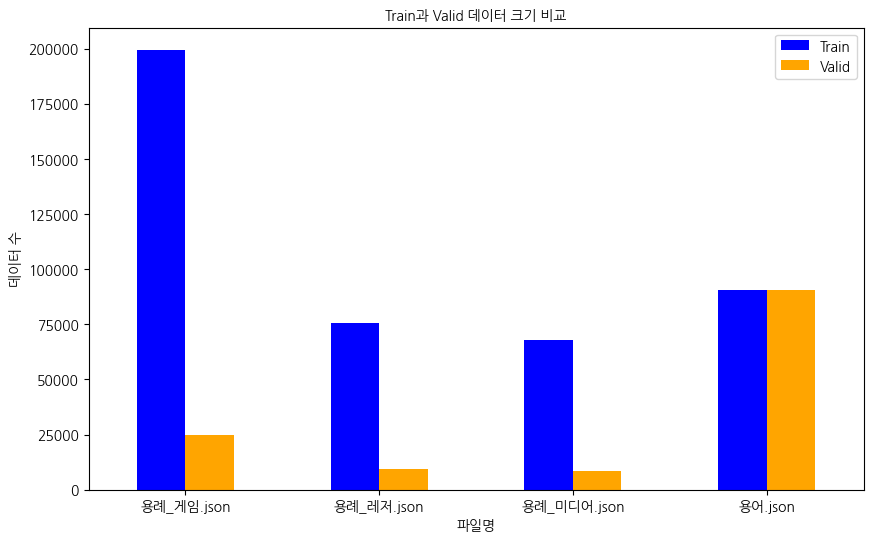

In [7]:
# 시각화 1 : 전체 데이터 분포
file_sizes = {
    "Train": {file: len(df) for file, df in data["Train"].items()},
    "Valid": {file: len(df) for file, df in data["Valid"].items()},
}

size_df = pd.DataFrame(file_sizes).reset_index()
size_df.columns = ["파일명", "Train", "Valid"]

# 시각화
size_df.plot(x="파일명", kind="bar", figsize=(10, 6), color=["blue", "orange"])
plt.title("Train과 Valid 데이터 크기 비교", fontproperties=font_prop)
plt.ylabel("데이터 수", fontproperties=font_prop)
plt.xlabel("파일명", fontproperties=font_prop)
plt.xticks(rotation=0, fontproperties=font_prop)
plt.show()


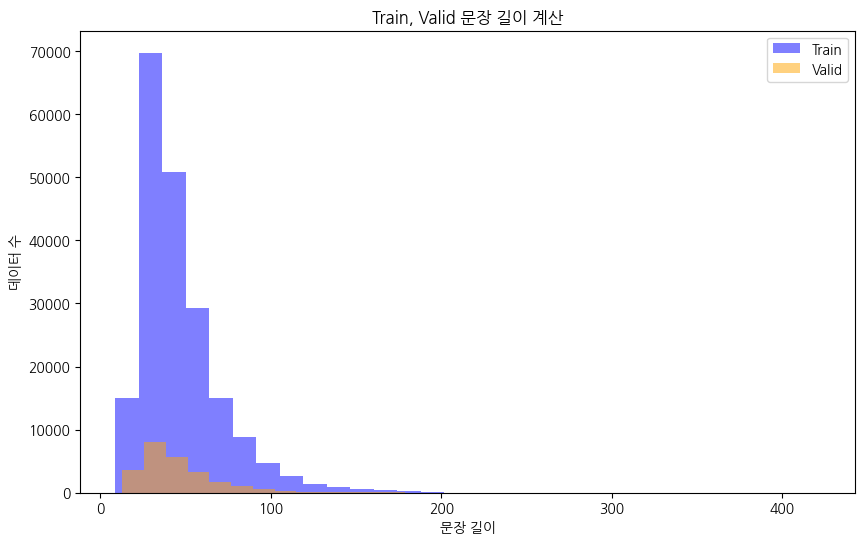

In [8]:
# 시각화 2 : 게임 데이터에서 Train, Valid 데이터셋의 문장 길이 계산
train_sentence_lengths = data["Train"]["용례_게임.json"]["sentence"].apply(len)
valid_sentence_lengths = data["Valid"]["용례_게임.json"]["sentence"].apply(len)

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(train_sentence_lengths, bins=30, alpha=0.5, label="Train", color="blue")
plt.hist(valid_sentence_lengths, bins=30, alpha=0.5, label="Valid", color="orange")
plt.title("Train, Valid 문장 길이 계산")
plt.xlabel("문장 길이")
plt.ylabel("데이터 수")
plt.legend()
plt.show()

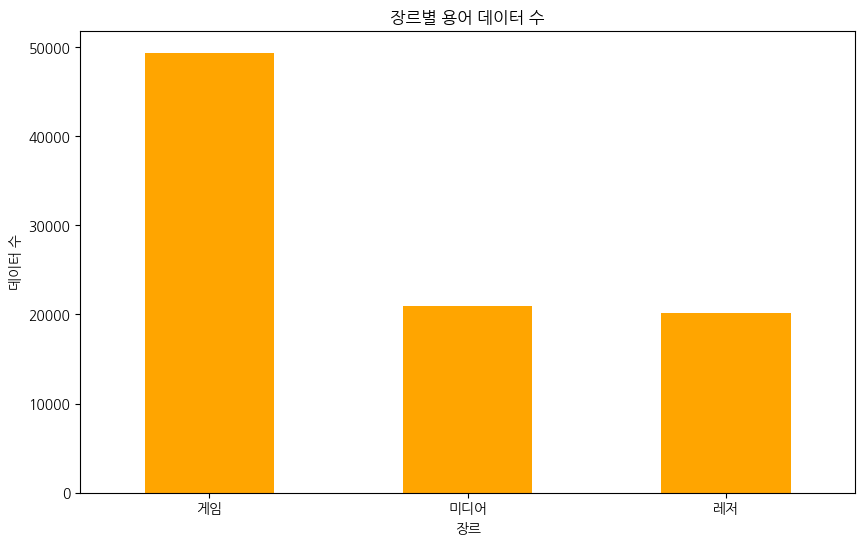

In [23]:
# 시각화 3 : 용어 데이터에서 장르별 데이터 수 계산
term_domain_counts = data["Train"]["용어.json"]["top_level_domain"].value_counts()

# 시각화
term_domain_counts.plot(kind="bar", figsize=(10, 6), color="orange")
plt.title("장르별 용어 데이터 수")
plt.ylabel("데이터 수")
plt.xlabel("장르")
plt.xticks(rotation=0)
plt.show()

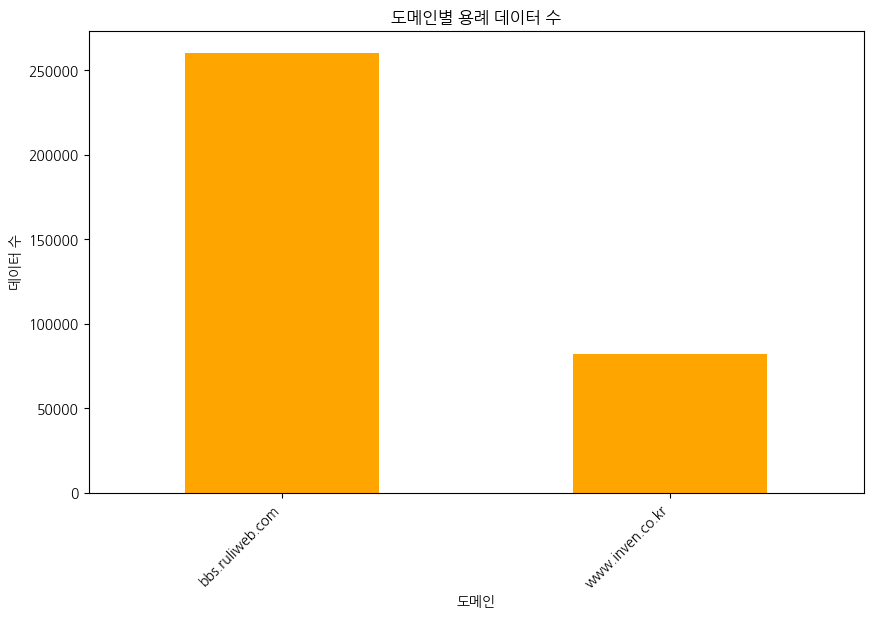

In [24]:
# 시각화 4 : 용례 데이터 통합 후, 도메인(데이터 추출 사이트)별 데이터 수 계산
def extract_domain(uri):
    from urllib.parse import urlparse
    parsed_uri = urlparse(uri)
    return parsed_uri.netloc

# 도메인 추출 및 데이터 합치기
usage_data = pd.concat([
    data["Train"]["용례_게임.json"],
    data["Train"]["용례_레저.json"],
    data["Train"]["용례_미디어.json"]
])
usage_data["domain"] = usage_data["source"].apply(lambda x: extract_domain(x["uri"]))

# 도메인별 데이터 수 계산
usage_domain_counts = usage_data["domain"].value_counts()

# 시각화
usage_domain_counts.plot(kind="bar", figsize=(10, 6), color="orange")
plt.title("도메인별 용례 데이터 수")
plt.ylabel("데이터 수")
plt.xlabel("도메인")
plt.xticks(rotation=45, ha="right")
plt.show()

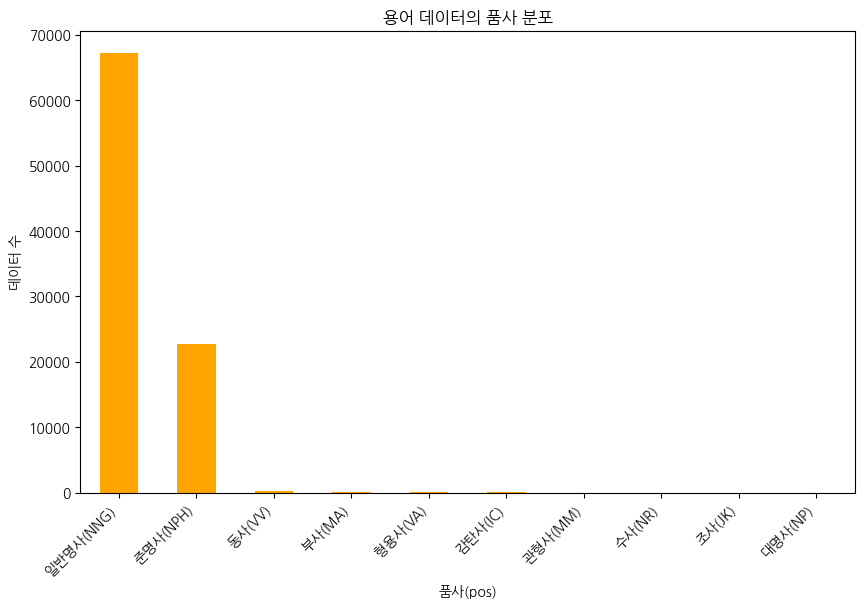

In [42]:
# 시각화 5 : 용어 중 pos(품사) 데이터 수 계산
# 용어 데이터 변수 설정
term_data = data["Train"]["용어.json"]

# 품사(pos)별 데이터 수 계산
pos_counts = term_data["pos"].value_counts()

# 시각화
pos_counts.plot(kind="bar", figsize=(10, 6), color="orange")
plt.title("용어 데이터의 품사 분포")
plt.ylabel("데이터 수")
plt.xlabel("품사(pos)")
plt.xticks(rotation=45, ha="right")
plt.show()

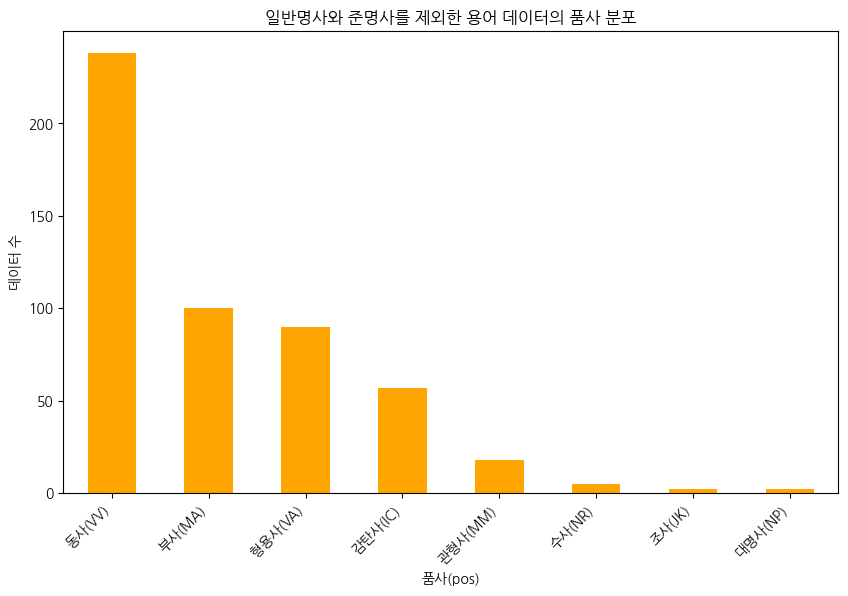

In [43]:
# 시각화 6 : 용어 중, 가장 많은 비율인 일반명사(NNG)와 준명사(NPH)를 제외 후 분포 확인
# 품사(pos)별 데이터 수 계산
pos_counts = term_data["pos"].value_counts()

# 일반명사와 준명사 제외
filtered_pos_counts = pos_counts.drop(labels=["일반명사(NNG)", "준명사(NPH)"])

# 시각화
filtered_pos_counts.plot(kind="bar", figsize=(10, 6), color="orange")
plt.title("일반명사와 준명사를 제외한 용어 데이터의 품사 분포")
plt.ylabel("데이터 수")
plt.xlabel("품사(pos)")
plt.xticks(rotation=45, ha="right")
plt.show()

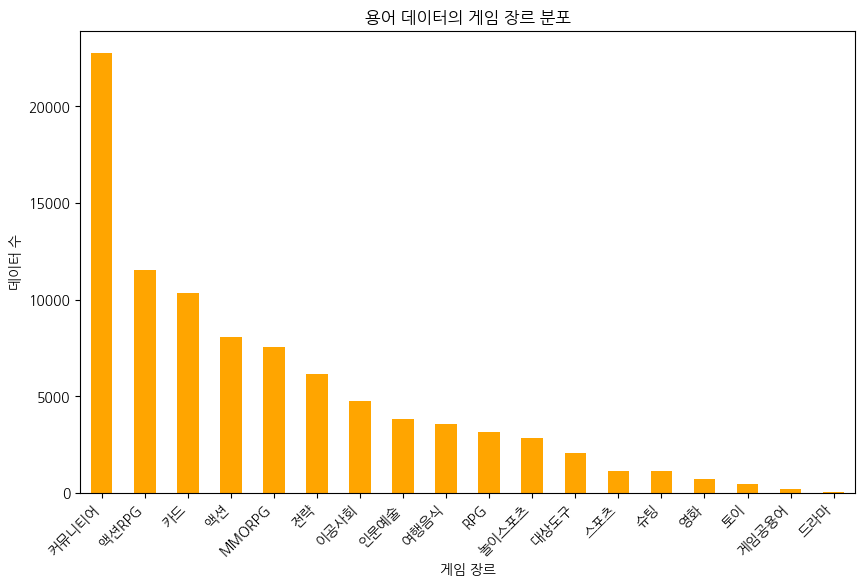

In [44]:
# 시각화 7 : 용어 중 level2 (게임 장르) 데이터 수 계산
# level2 (게임 장르)별 데이터 수 계산
level2_counts = term_data["level2"].value_counts()

# 시각화
level2_counts.plot(kind="bar", figsize=(10, 6), color="orange")
plt.title("용어 데이터의 게임 장르 분포")
plt.ylabel("데이터 수")
plt.xlabel("게임 장르")
plt.xticks(rotation=45, ha="right")
plt.show()

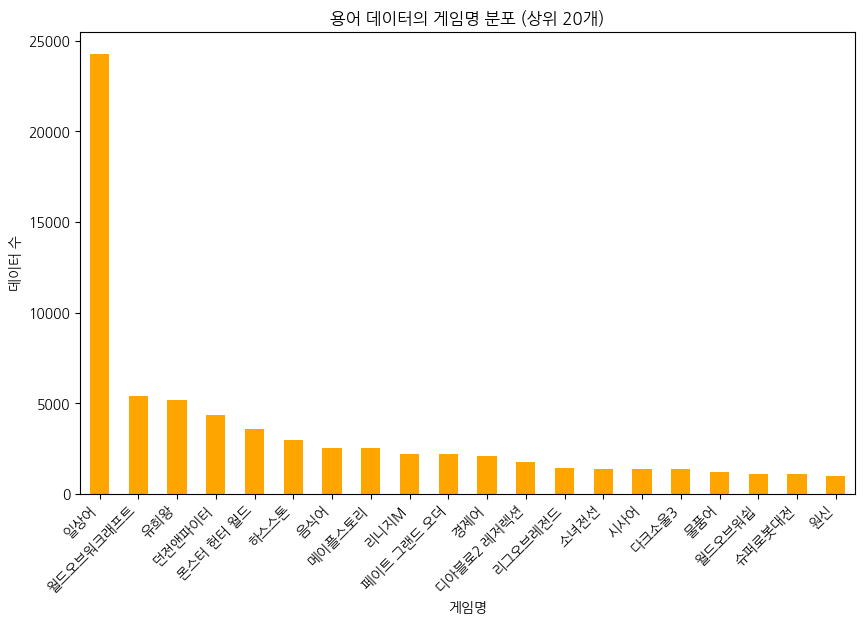

In [45]:
# 시각화 8 : 용어 중 level3 (게임 명) 데이터 수 계산
# level3 (게임 명)별 데이터 수 계산

# 상위 20개 게임명만 표시
level3_counts = term_data["level3"].value_counts().head(20)

# 시각화
level3_counts.plot(kind="bar", figsize=(10, 6), color="orange")
plt.title("용어 데이터의 게임명 분포 (상위 20개)")
plt.ylabel("데이터 수")
plt.xlabel("게임명")
plt.xticks(rotation=45, ha="right")
plt.show()

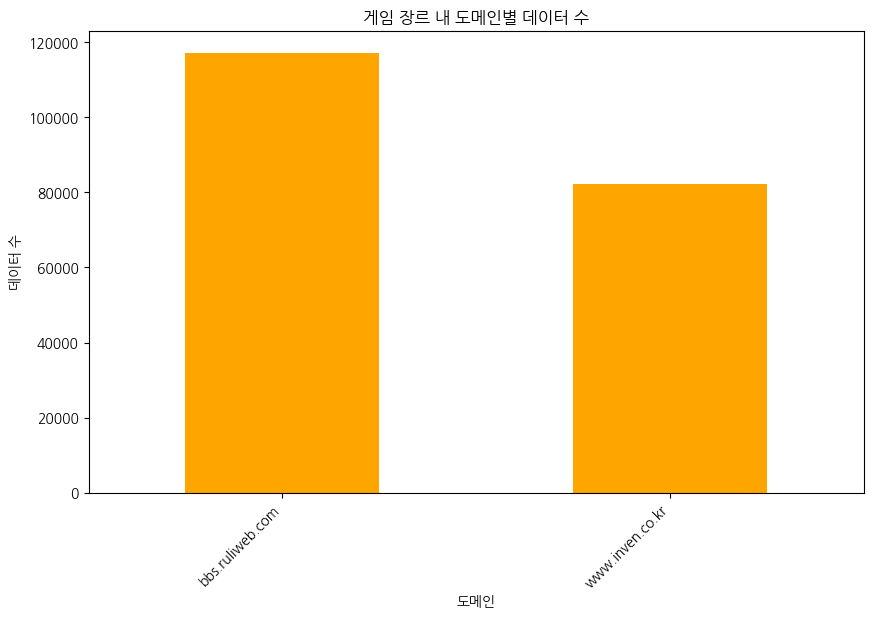

In [47]:
# 시각화 9 : 게임 장르 안에서, 도메인별 데이터 수 계산
def extract_domain(uri):
    from urllib.parse import urlparse
    parsed_uri = urlparse(uri)
    return parsed_uri.netloc

# 게임 데이터에서 도메인 추출
# 용례_게임 데이터 활용
game_data = data["Train"]["용례_게임.json"]
game_data["domain"] = game_data["source"].apply(lambda x: extract_domain(x["uri"]))

# 도메인별 데이터 수 계산
game_domain_counts = game_data["domain"].value_counts()

# 시각화
game_domain_counts.plot(kind="bar", figsize=(10, 6), color="orange")
plt.title("게임 장르 내 도메인별 데이터 수")
plt.ylabel("데이터 수")
plt.xlabel("도메인")
plt.xticks(rotation=45, ha="right")
plt.show()

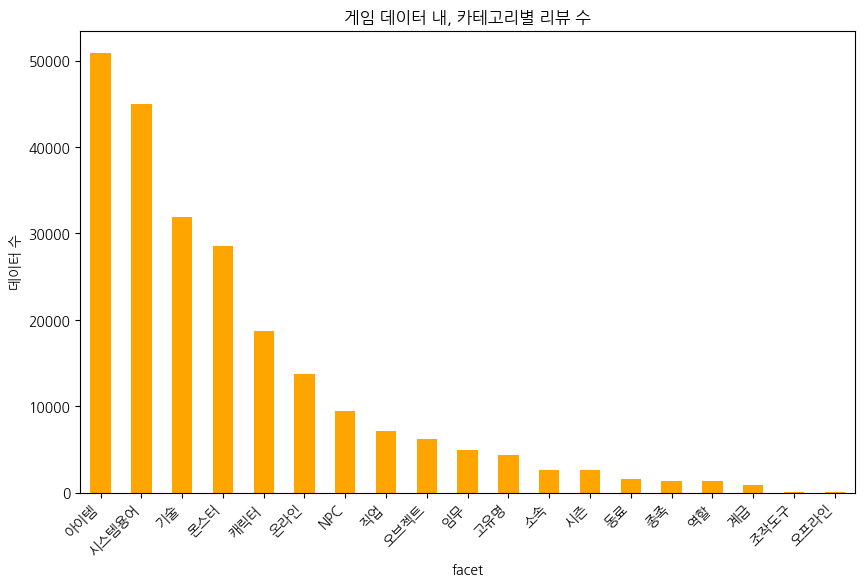

In [50]:
# 시각화 10 : 게임 데이터에서 facet 별(단어의 카테고리 별) 데이터 수 계산

# 패싯별 데이터 수 계산
game_facet_counts = game_data["tokens"].apply(lambda x: [token["facet"] for token in x])
game_facet_flat = [facet for sublist in game_facet_counts for facet in sublist]
game_facet_series = pd.Series(game_facet_flat).value_counts()

# 시각화
game_facet_series.plot(kind="bar", figsize=(10, 6), color="orange")
plt.title("게임 데이터 내, 카테고리별 리뷰 수")
plt.ylabel("데이터 수")
plt.xlabel("facet")
plt.xticks(rotation=45, ha="right")
plt.show()

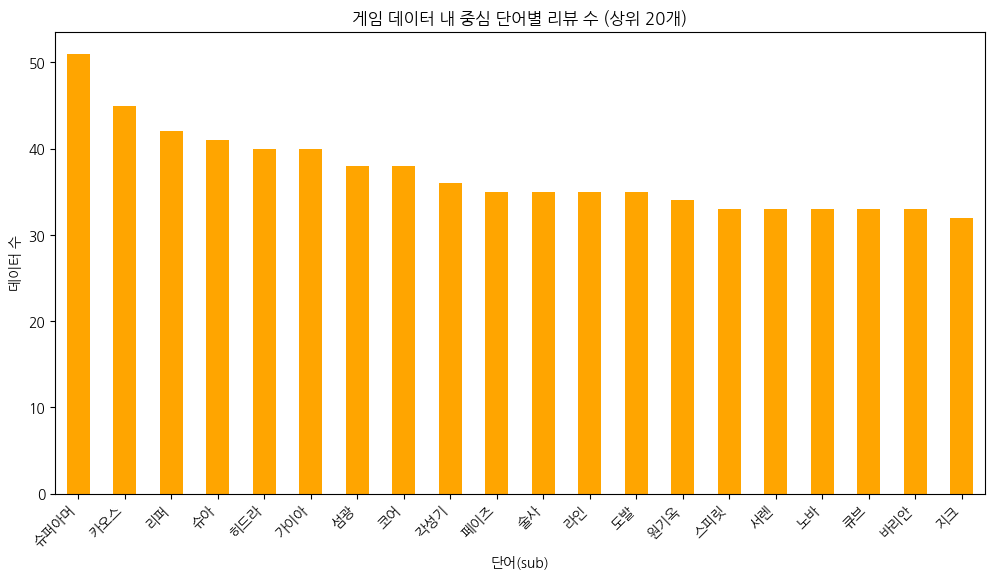

In [51]:
# 시각화 10 : 게임 데이터 안에서, sub(문장의 중심 단어)에 따른 데이터 수 계산
# sub 별 데이터 수 계산
game_sub_counts = game_data["tokens"].apply(lambda x: [token["sub"] for token in x])
game_sub_flat = [sub for sublist in game_sub_counts for sub in sublist]
game_sub_series = pd.Series(game_sub_flat).value_counts().head(20)  # 상위 20개만 표시

# 시각화
game_sub_series.plot(kind="bar", figsize=(12, 6), color="orange")
plt.title("게임 데이터 내 중심 단어별 리뷰 수 (상위 20개)")
plt.ylabel("데이터 수")
plt.xlabel("단어(sub)")
plt.xticks(rotation=45, ha="right")
plt.show()

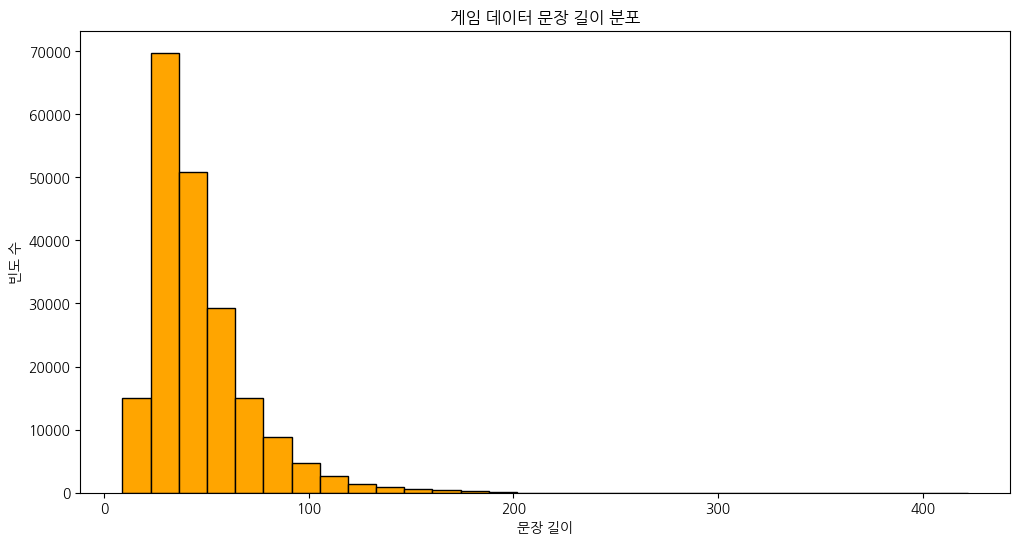

In [53]:
# 시각화 11 : 게임 데이터의 용례 중, length(문장 길이) 분포 계산
# 문장 길이 계산
game_data["sentence_length"] = game_data["sentence"].apply(len)

# 시각화
plt.figure(figsize=(12, 6))
plt.hist(game_data["sentence_length"], bins=30, color="orange", edgecolor="black")
plt.title("게임 데이터 문장 길이 분포")
plt.xlabel("문장 길이")
plt.ylabel("빈도 수")
plt.show()

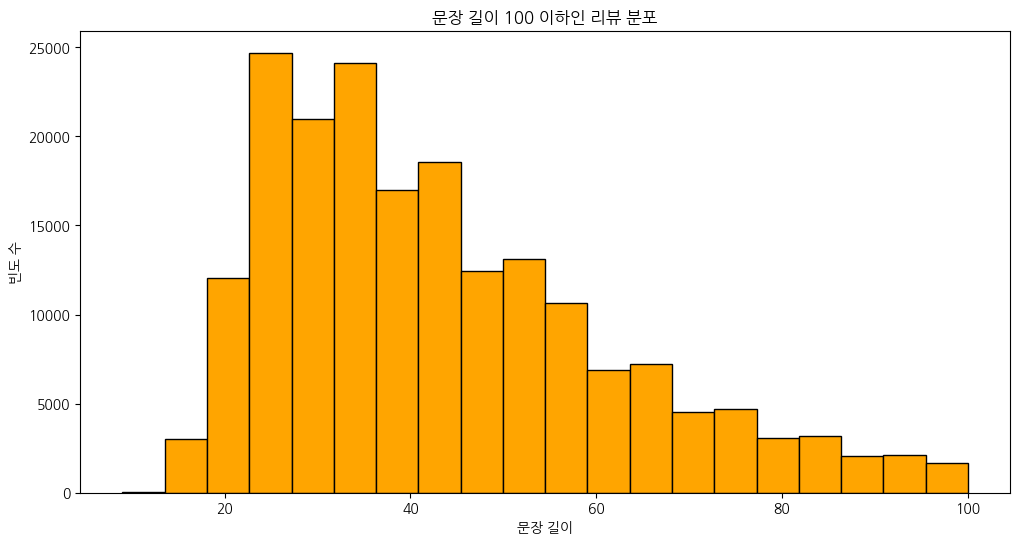

In [54]:
# 시각화 12 : 문장 길이가 100 이하인 리뷰 위주 분포 확인
# 문장 길이 100 이하 데이터 필터링
short_sentences = game_data[game_data["sentence_length"] <= 100]

# 히스토그램 시각화
plt.figure(figsize=(12, 6))
plt.hist(short_sentences["sentence_length"], bins=20, color="orange", edgecolor="black")
plt.title("문장 길이 100 이하인 리뷰 분포")
plt.xlabel("문장 길이")
plt.ylabel("빈도 수")
plt.show()